# House Price Prediction

### Importing Libraries

In [183]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import warnings
warnings.filterwarnings('ignore')

### Importing Data Set

In [184]:
data = pd.read_csv('data.csv')

### Analyzing Data

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [186]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [187]:
data.sample(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
141,2014-05-05 00:00:00,340000.0,2.0,1.50,1160,1438,2.0,0,0,3,1160,0,2001,0,1318 29th Ave S,Seattle,WA 98144,USA
3773,2014-07-01 00:00:00,406000.0,4.0,1.00,1580,8475,1.5,0,2,4,1580,0,1928,0,10041 64th Ave S,Seattle,WA 98178,USA
2520,2014-06-14 00:00:00,735000.0,4.0,2.75,2450,4187,2.0,0,2,3,2450,0,2010,0,1750 10th Ave NE,Issaquah,WA 98029,USA
630,2014-05-14 00:00:00,542000.0,4.0,1.75,1900,8250,1.0,0,0,4,950,950,1955,2009,3810 145th Ave SE,Bellevue,WA 98006,USA
2662,2014-06-17 00:00:00,1008000.0,4.0,3.50,2650,3060,2.0,0,0,3,2060,590,2001,0,2133 N 62nd St,Seattle,WA 98103,USA


In [188]:
data.value_counts()

date                 price      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  yr_renovated  street                  city           statezip  country
2014-05-02 00:00:00  235000.0   2.0       1.00       1210         9400      1.0     0           0     2          1210        0              1949      0             7542 21st Ave SW        Seattle        WA 98106  USA        1
2014-06-19 00:00:00  519000.0   3.0       2.75       2020         10744     1.0     0           0     5          1270        750            1954      0             18107-18199 6th Ave SW  Normandy Park  WA 98166  USA        1
                     576000.0   3.0       2.50       1940         9000      1.0     0           0     4          970         970            1948      0             8817 28th Ave NW        Seattle        WA 98117  USA        1
                     558000.0   4.0       2.25       2060         10358     1.0     0           0    

In [189]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [190]:
data.drop_duplicates()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


### EDA

#### Histogram

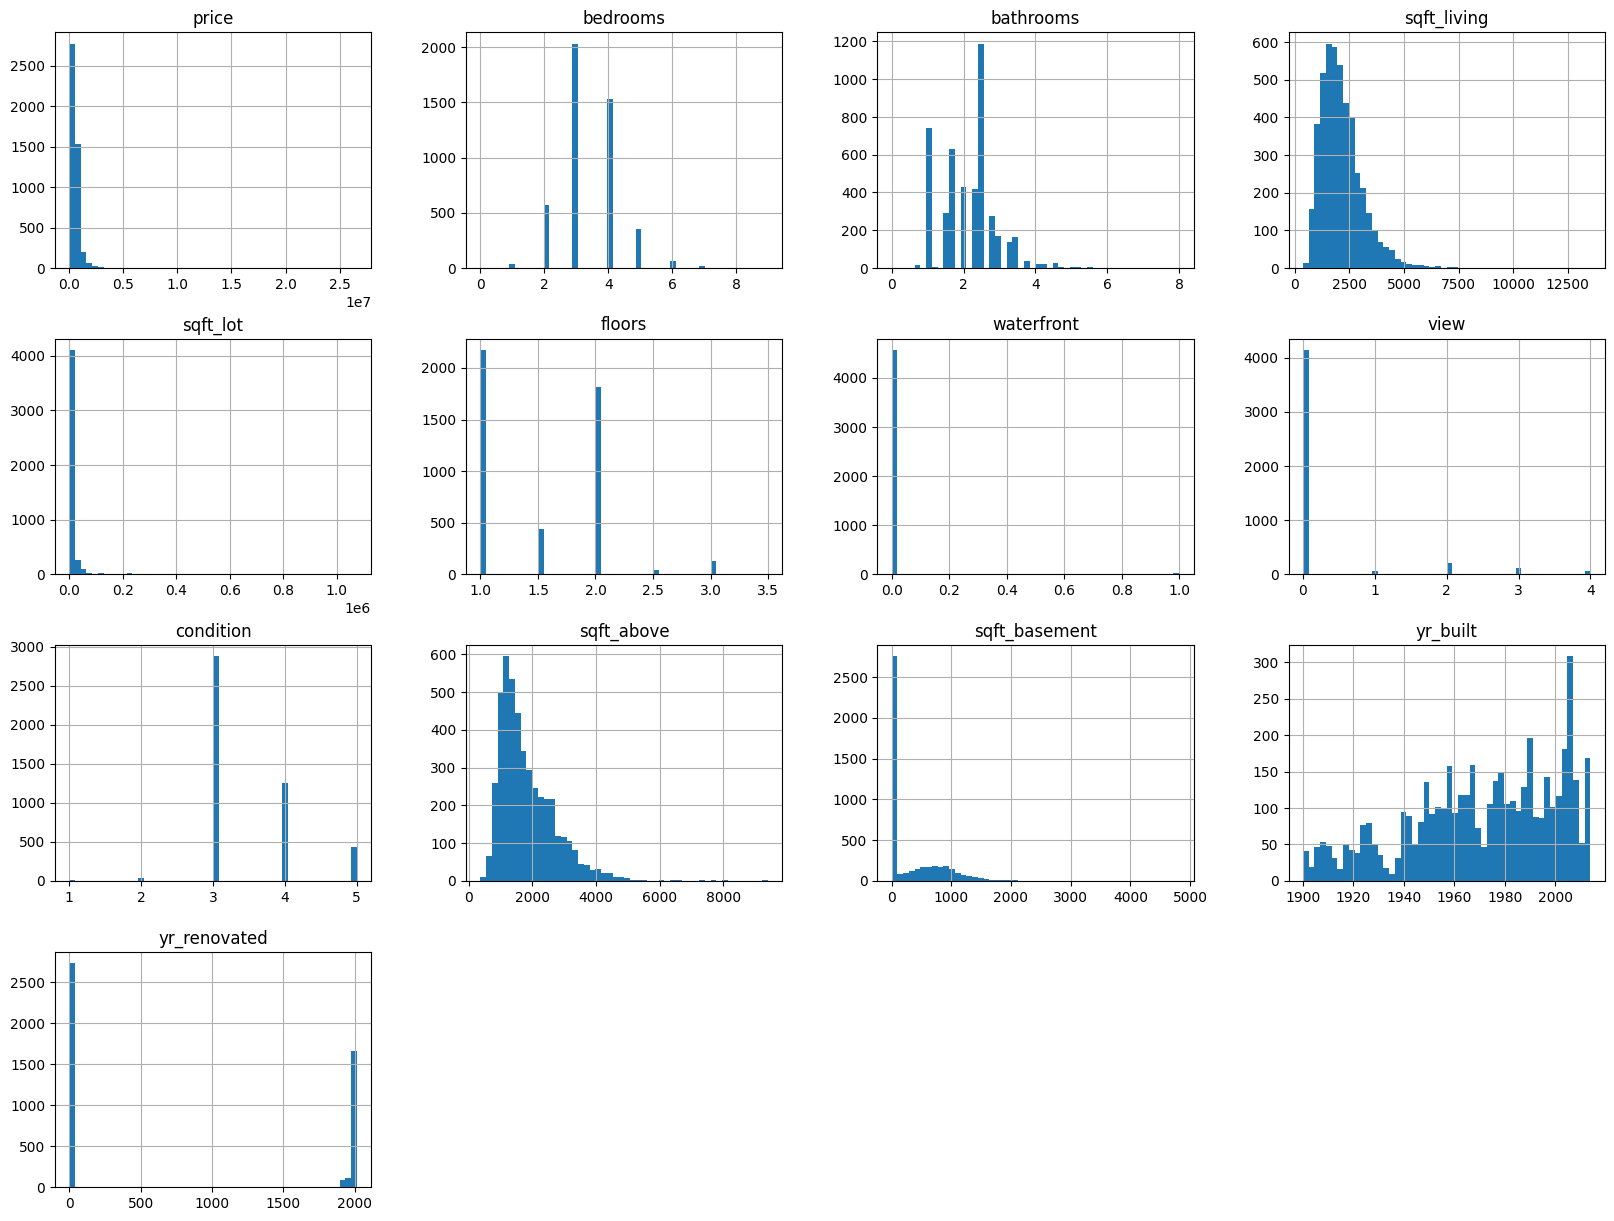

In [191]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [192]:
data['date'] = pd.to_datetime(data['date'])
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [193]:
data.insert(1, "year", data.date.dt.year)
data.head()

,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,2014,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2014,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,2014,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,2014,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,2014,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


#### Dropping Unnecessary Columns

In [194]:
# street	city	statezip	country
data = data.drop("street",axis=1)
data = data.drop("city",axis=1)
data = data.drop("statezip",axis=1)
data = data.drop("country",axis=1)
data = data.drop("date",axis=1)
data = data.drop("sqft_above",axis=1)
data

,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated
0,2014,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,0,1955,2005
1,2014,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,280,1921,0
2,2014,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,0,1966,0
3,2014,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1963,0
4,2014,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,0,1954,1979
4596,2014,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,0,1983,2009
4597,2014,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,0,2009,0
4598,2014,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1020,1974,0


#### Corelation 

In [195]:
data.corr()

,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.210427,0.021857,-0.028774
bedrooms,NaN,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.334165,0.142461,-0.061082
bathrooms,NaN,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.298020,0.463498,-0.215886
sqft_living,NaN,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.447206,0.287775,-0.122817
sqft_lot,NaN,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.034842,0.050706,-0.022730
floors,NaN,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,-0.255510,0.467481,-0.233996
waterfront,NaN,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.097501,-0.023563,0.008625
view,NaN,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.321602,-0.064465,0.022967
condition,NaN,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,0.200632,-0.399698,-0.186818


#### Heat Map

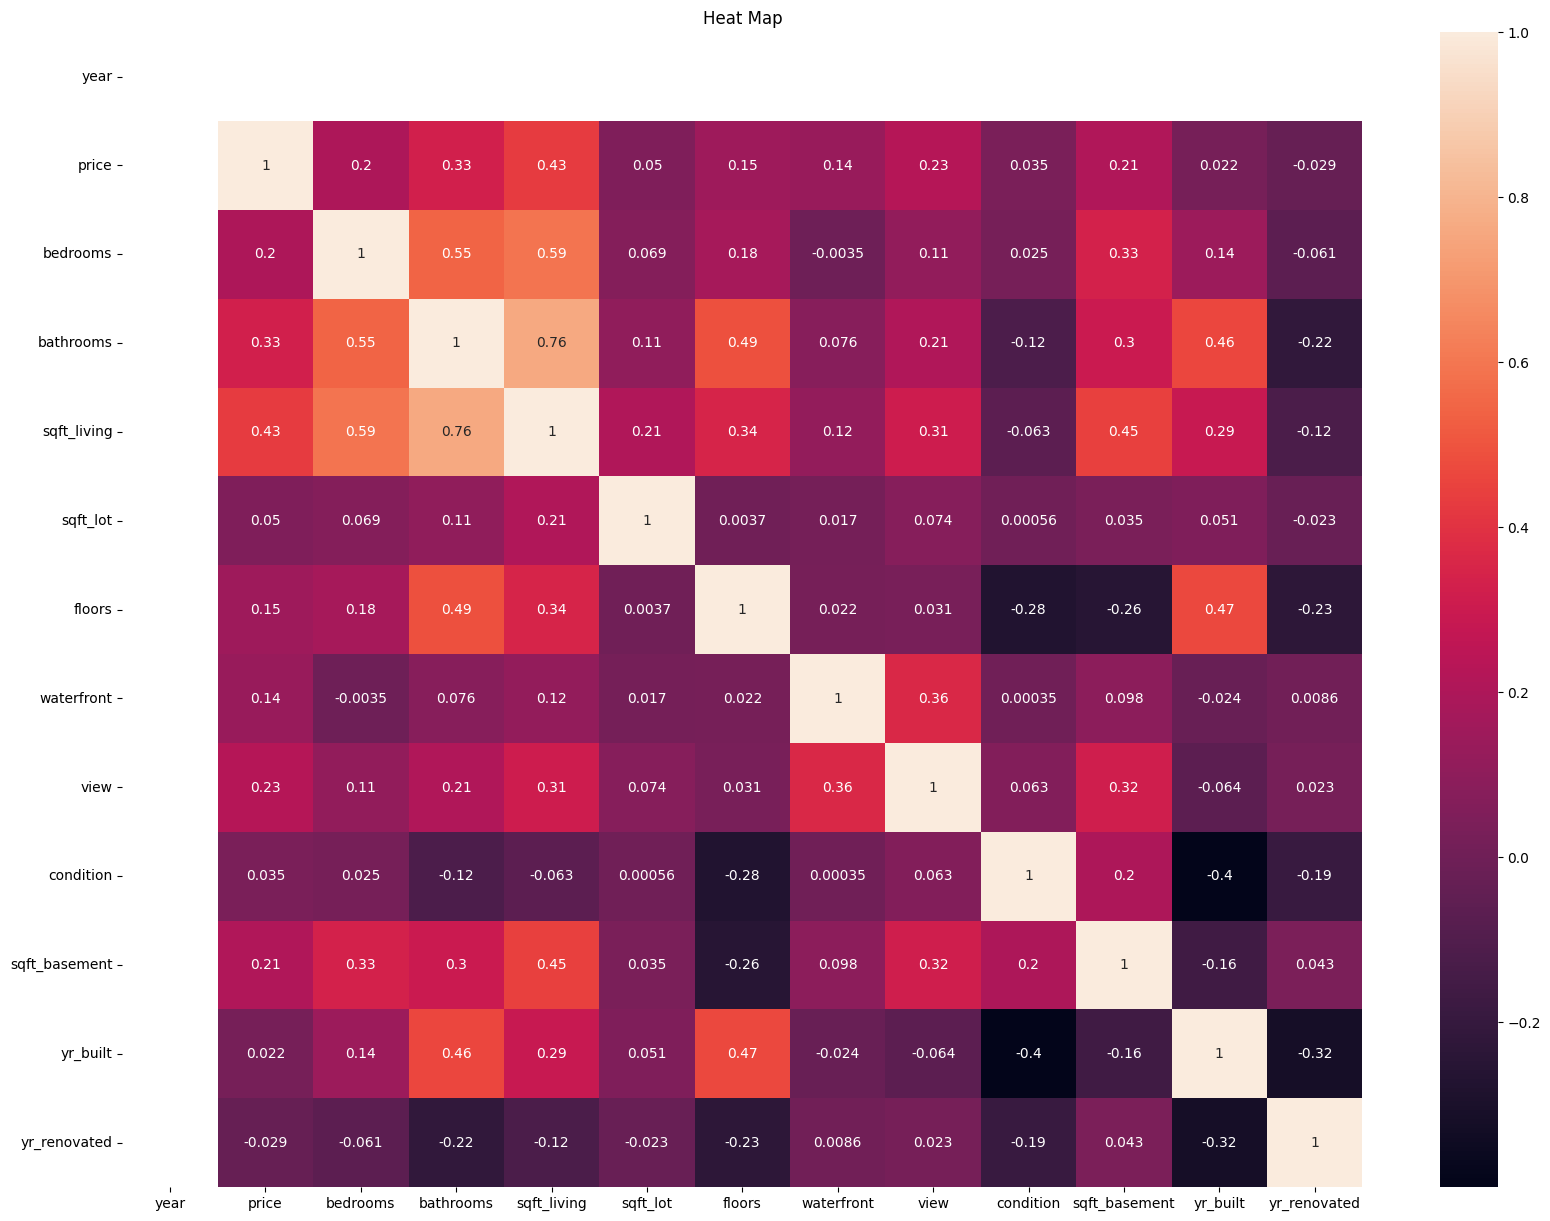

In [196]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)
plt.title('Heat Map')
plt.yticks(rotation = 0)
plt.show()

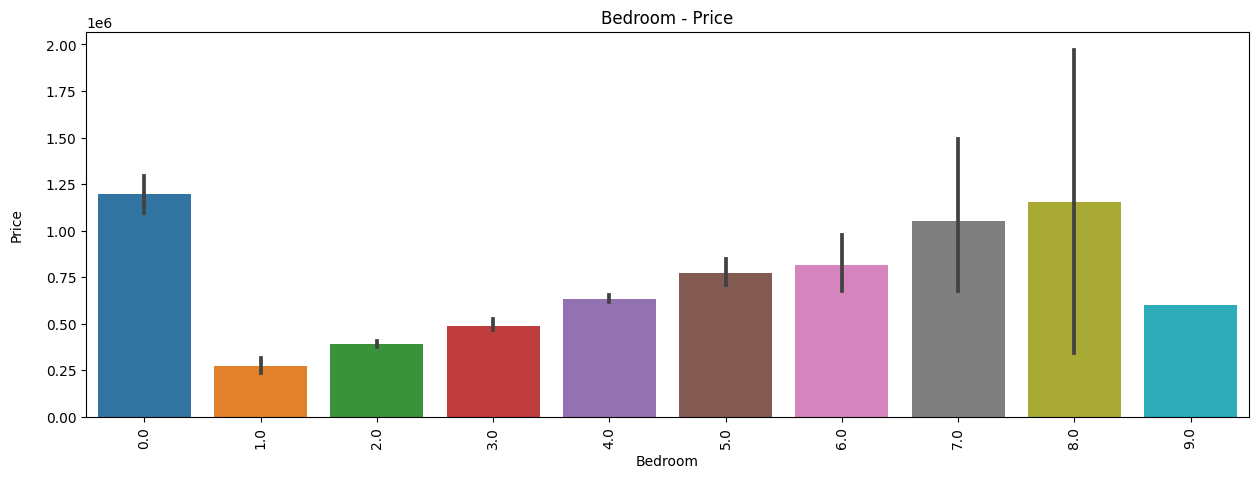

In [197]:
plt.figure(figsize=(15, 5))
sns.barplot(x = data['bedrooms'], y = data.price)
plt.xticks( horizontalalignment="center",rotation = 90 )
plt.xlabel("Bedroom")
plt.title("Bedroom - Price")
plt.ylabel("Price\n")

plt.show()

In [198]:
def plots(column):
    plt.figure(figsize=(30,10))
    plt.subplot(1,2,1)
    plt.grid(color='black', linestyle='-', linewidth=0.25)
    sns.scatterplot(x=data[column],y=data.price, hue=data[column])
    plt.xticks( horizontalalignment= 'center')
    plt.xlabel(column)
    plt.yticks(fontsize= 15)
    plt.ylabel('Price')
    plt.title(f"\n{str(column)} - Price \n")
    
    plt.subplot(1,2,2)
    plt.grid(color='black', linestyle='-', linewidth= 0.25)
    sns.boxplot(data[column])
    plt.xticks( horizontalalignment='center', fontsize= 15)
    plt.xlabel(f"{str(column)}")
    plt.yticks(fontsize= 15)
    plt.title(f"{str(column)} Boxplot \n", fontsize= 15)
    
    plt.show()
    print()

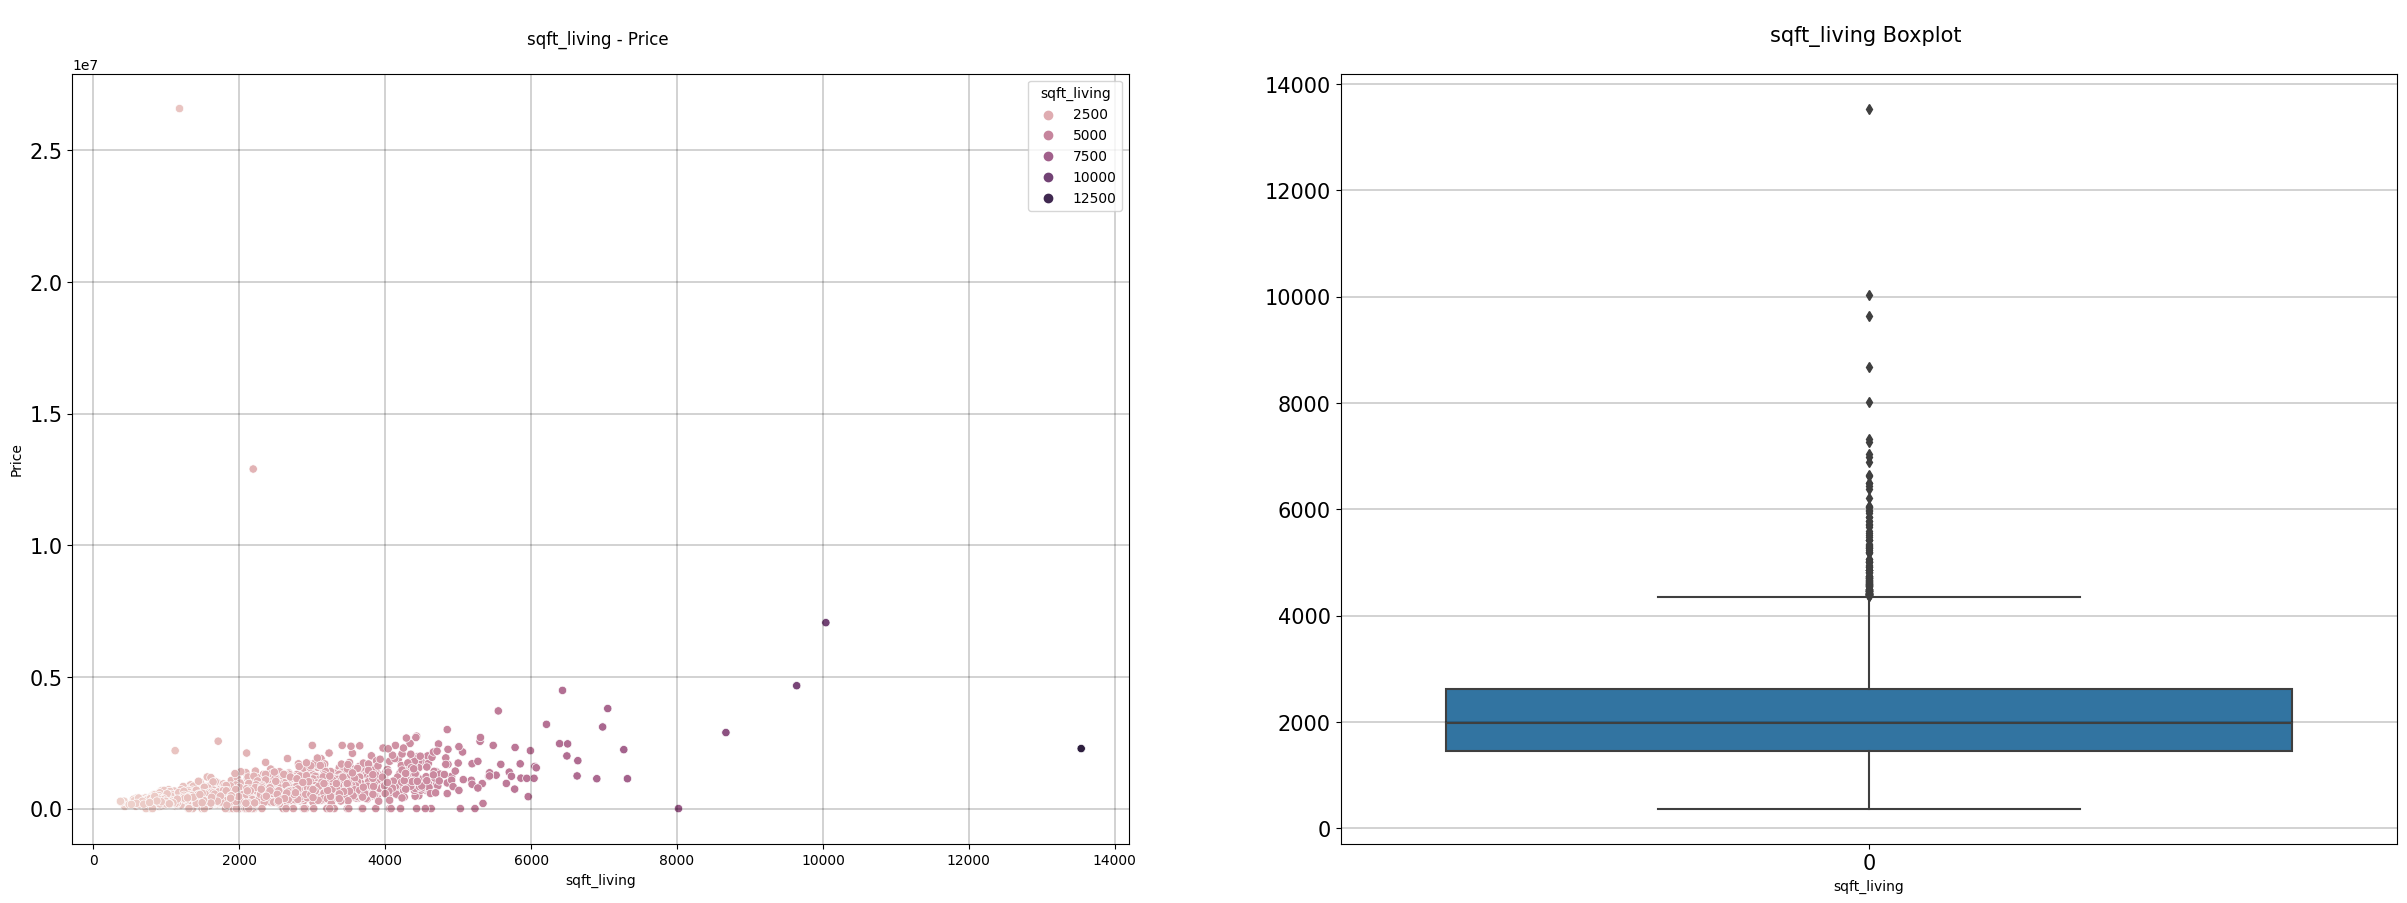

In [199]:
plots("sqft_living")

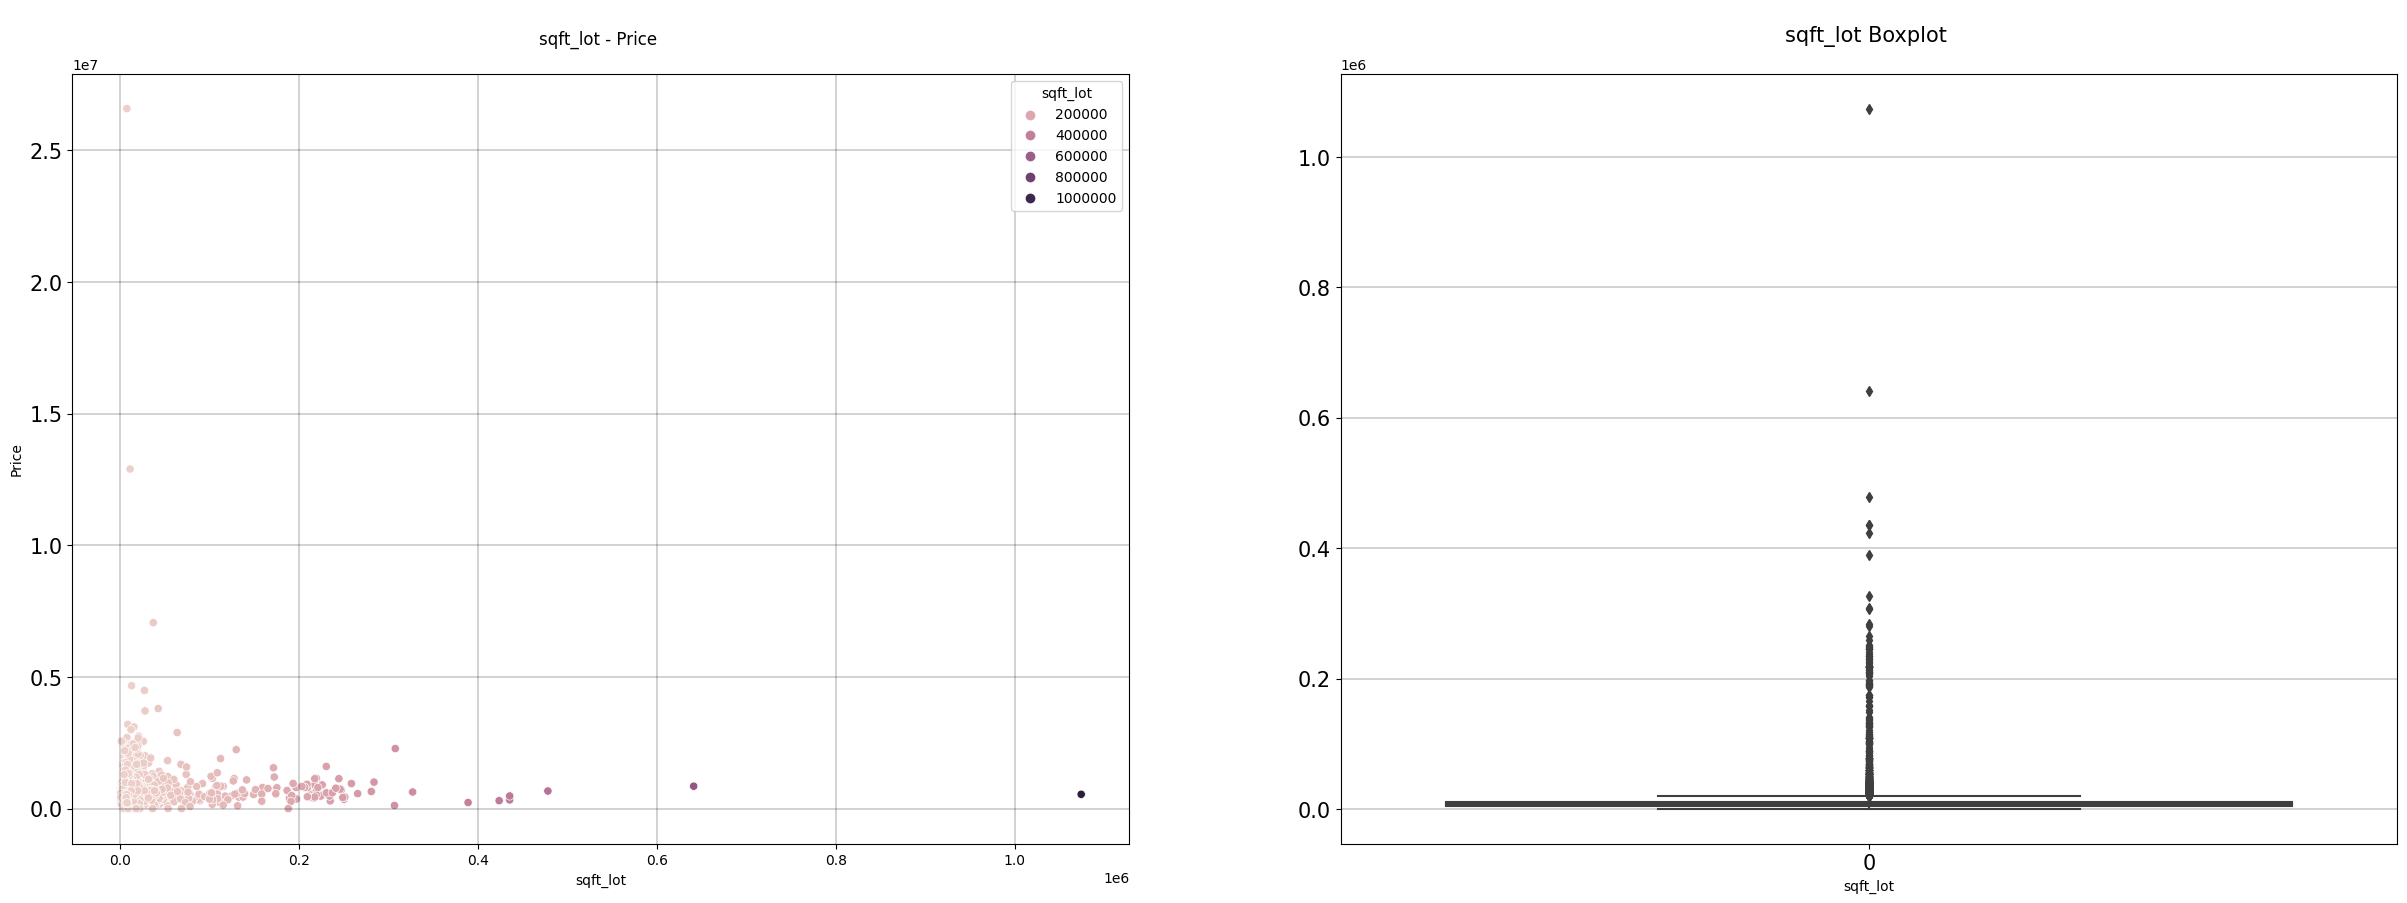

In [200]:
plots("sqft_lot")

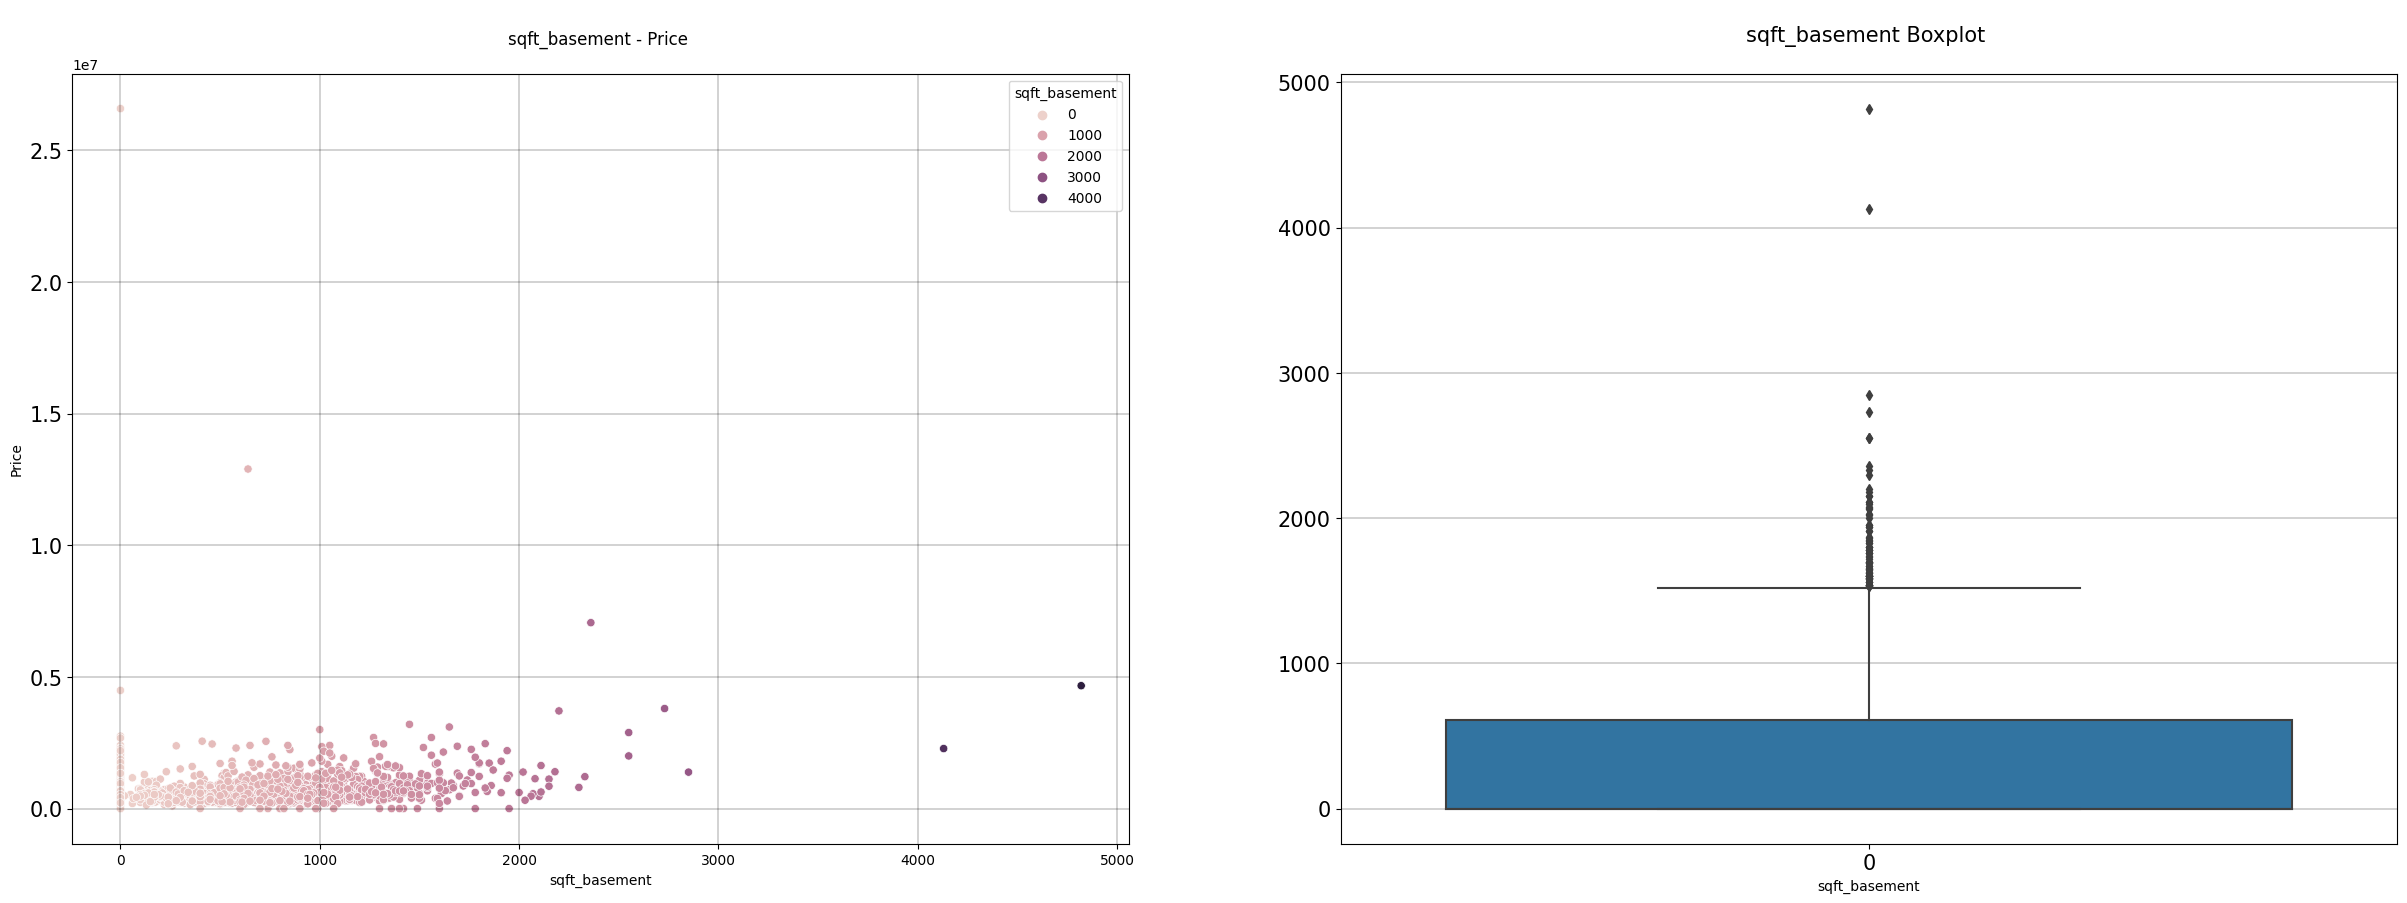

In [201]:
plots("sqft_basement")

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='bedrooms', ylabel='price'>,
        <Axes: xlabel='bathrooms', ylabel='price'>,
        <Axes: xlabel='sqft_living', ylabel='price'>,
        <Axes: xlabel='sqft_lot', ylabel='price'>,
        <Axes: xlabel='floors', ylabel='price'>,
        <Axes: xlabel='view', ylabel='price'>,
        <Axes: xlabel='condition', ylabel='price'>,
        <Axes: xlabel='sqft_basement', ylabel='price'>,
        <Axes: xlabel='yr_built', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='bedrooms'>,
        <Axes: xlabel='bedrooms', ylabel='bedrooms'>,
        <Axes: xlabel='bathrooms', ylabel='bedrooms'>,
        <Axes: xlabel='sqft_living', ylabel='bedrooms'>,
        <Axes: xlabel='sqft_lot', ylabel='bedrooms'>,
        <Axes: xlabel='floors', ylabel='bedrooms'>,
        <Axes: xlabel='view', ylabel='bedrooms'>,
        <Axes: xlabel='condition', ylabel='bedrooms'>,
        <Axes: xlabel='sqft_basement', ylabel='bedrooms'>,
 

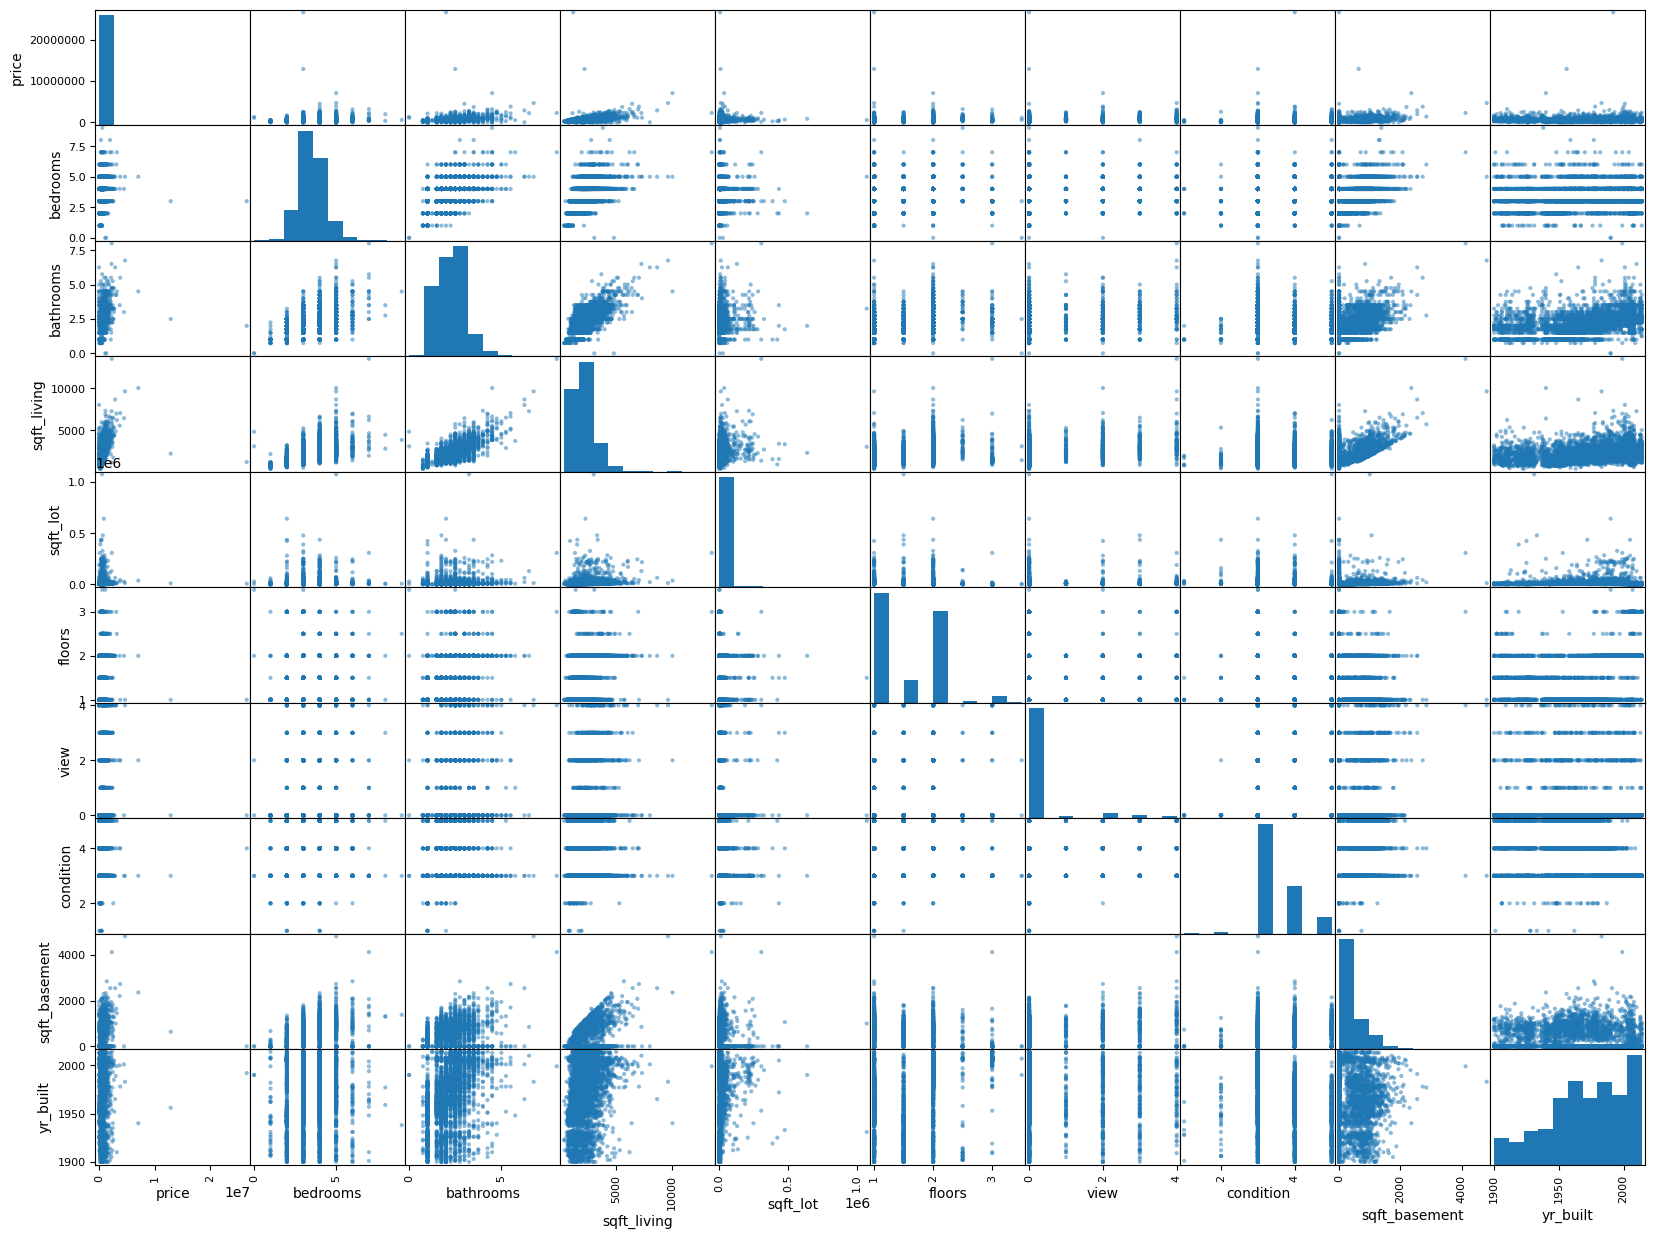

In [202]:
from pandas.plotting import scatter_matrix
attributes = ["price","bedrooms","bathrooms","sqft_living", "sqft_lot", "floors", "view", "condition", "sqft_basement", "yr_built",]
scatter_matrix(data[attributes], figsize=(20,15))

In [203]:
cor_matrix = data.corr()
cor_matrix['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.430410
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
yr_renovated    -0.028774
year                  NaN
Name: price, dtype: float64

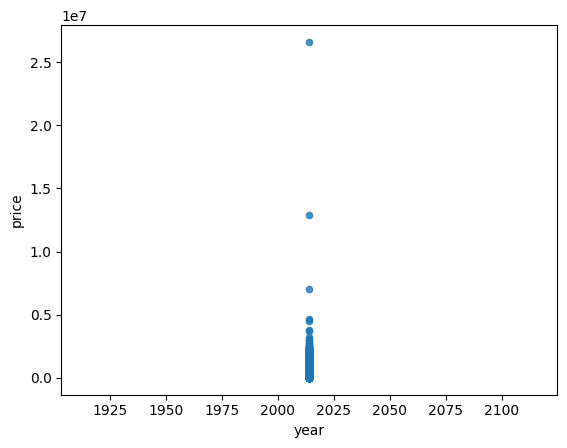

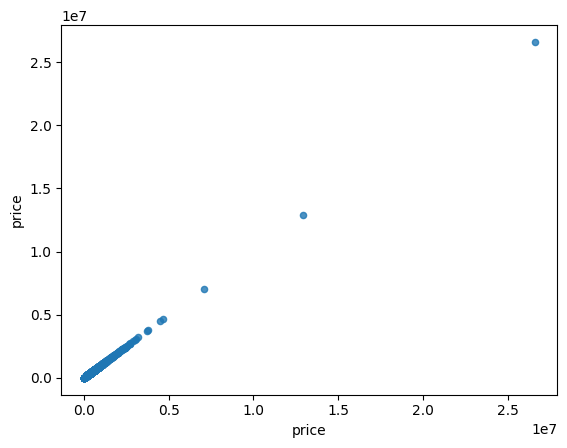

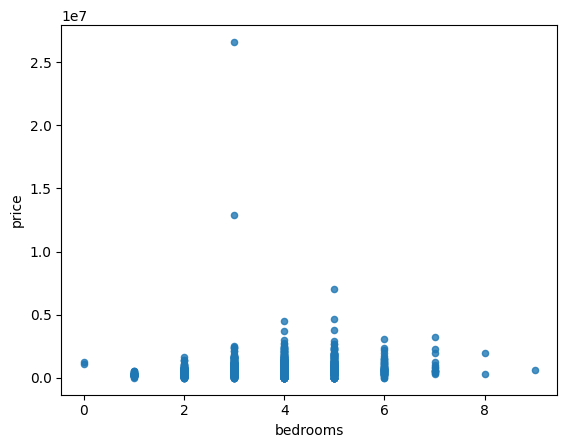

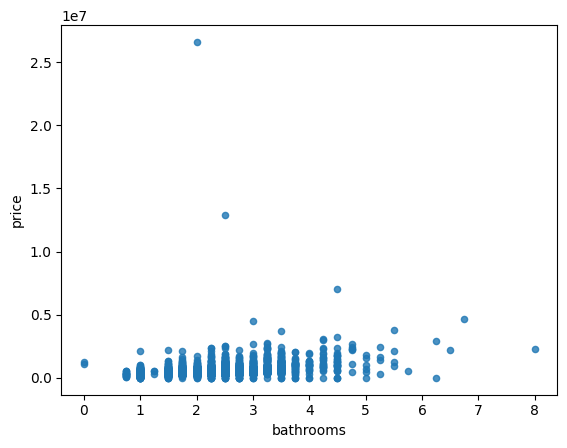

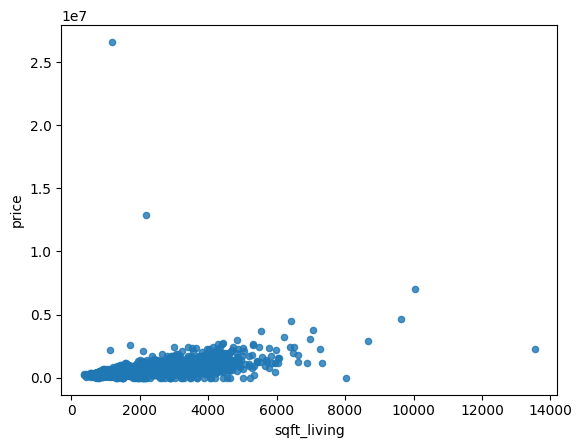

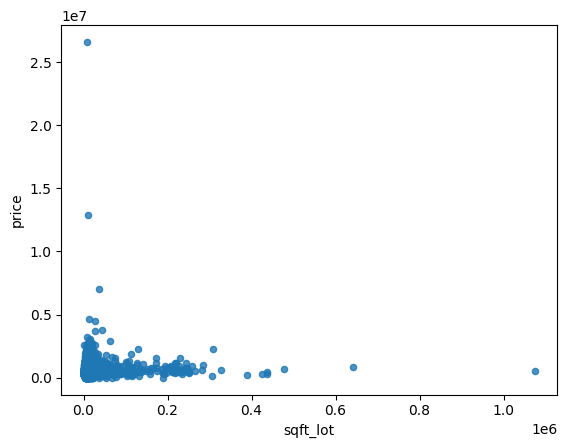

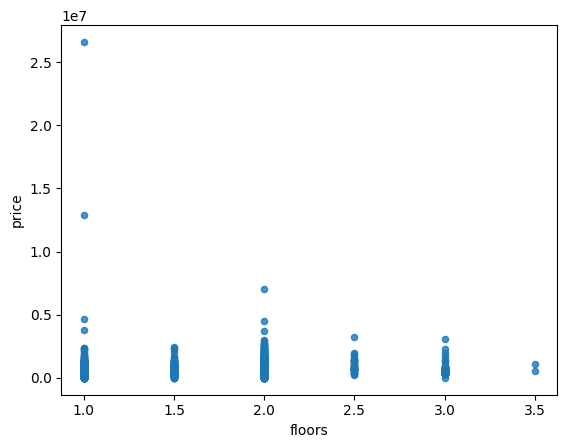

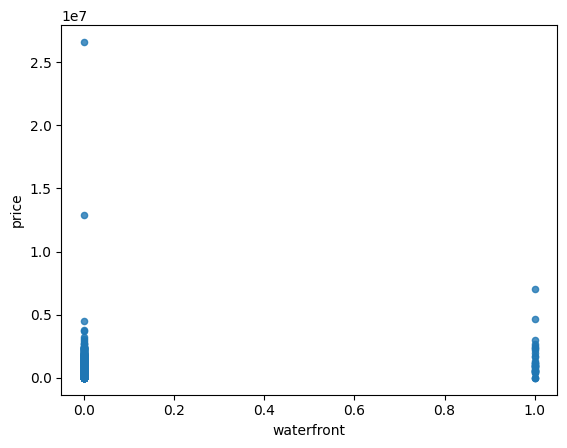

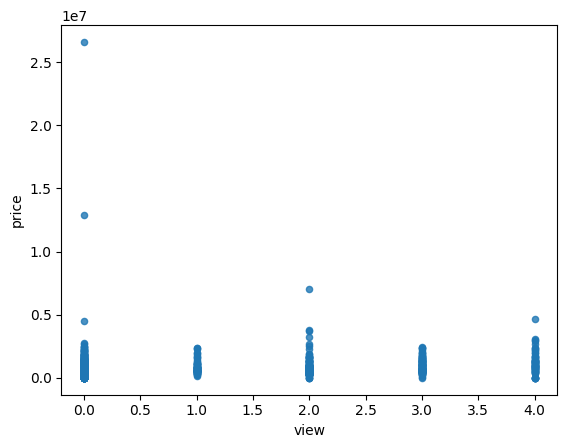

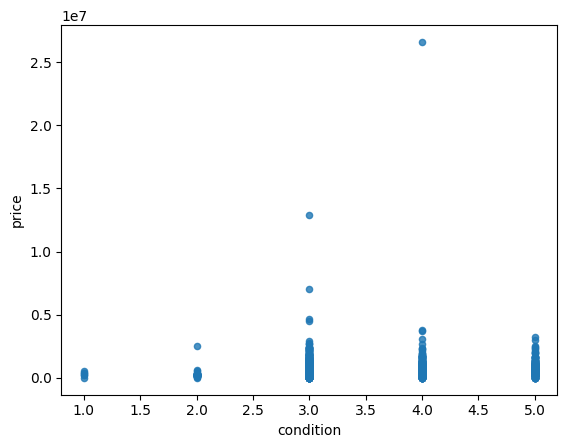

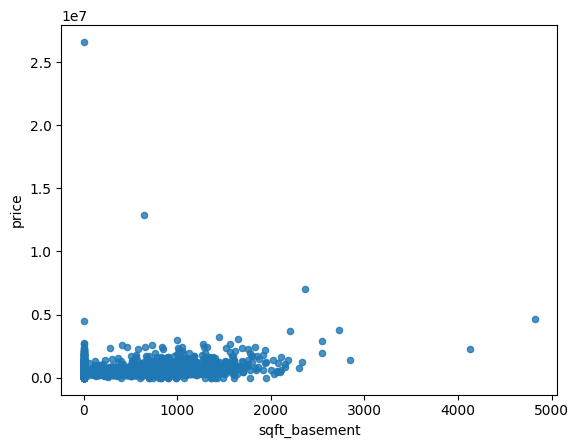

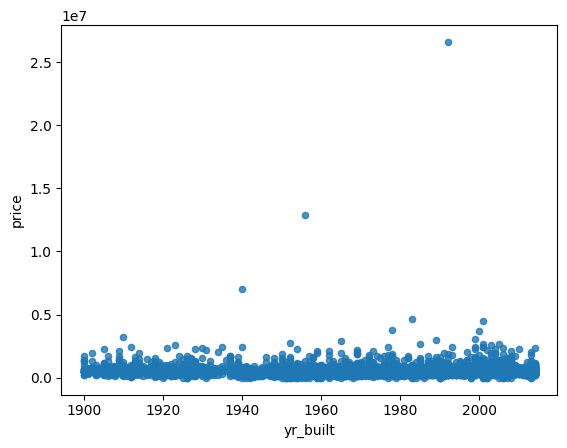

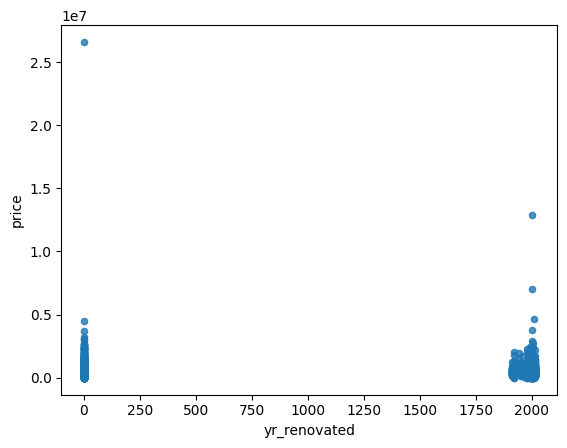

In [204]:
for columns in data:
    data.plot(kind='scatter',x=columns, y="price", alpha=0.8)

<Figure size 3000x1000 with 0 Axes>

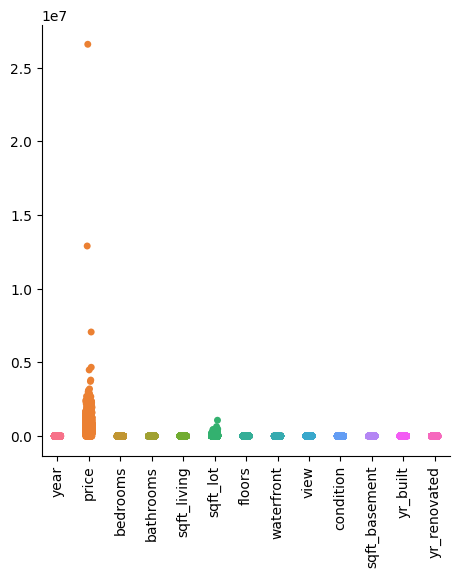

In [205]:
plt.figure(figsize=(30,10))
sns.catplot(data)
plt.xticks( horizontalalignment="center",rotation = 90 )
plt.show()

# Data Cleaning

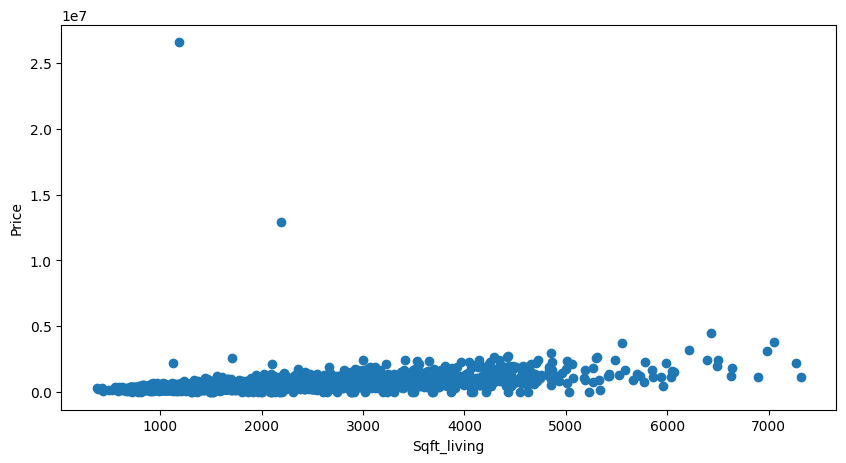

In [206]:
data.drop(data[data['sqft_living'] >= 8000].index, inplace = True)
plt.figure(figsize=(10,5))
plt.xlabel('Sqft_living')
plt.ylabel('Price')
plt.scatter(data.sqft_living,data.price)

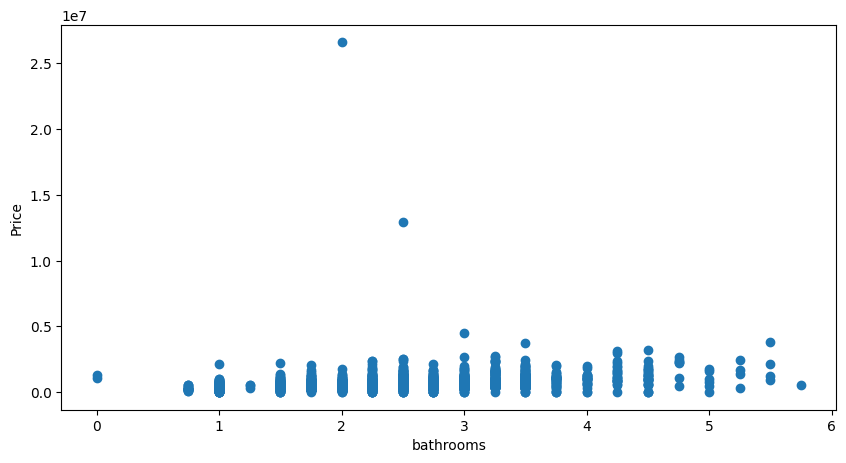

In [209]:
data.drop(data[data['bathrooms'] >= 6].index, inplace = True)
plt.figure(figsize=(10,5))
plt.xlabel('bathrooms')
plt.ylabel('Price')
plt.scatter(data.bathrooms,data.price)

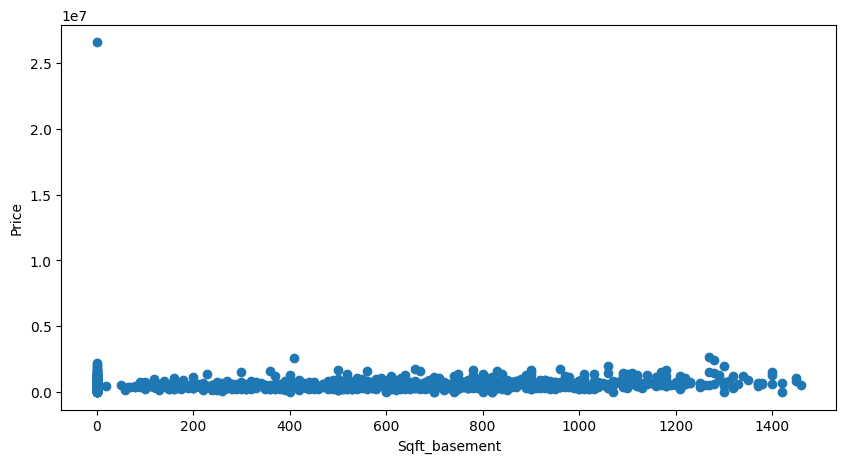

In [219]:
data.drop(data[data['sqft_basement'] >= 1500].index, inplace = True)
plt.figure(figsize=(10,5))
plt.xlabel('Sqft_basement')
plt.ylabel('Price')
plt.scatter(data.sqft_basement,data.price)

In [220]:
data.describe()

,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated
count,2435.0,2.435000e+03,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000
mean,2014.0,5.147350e+05,3.252977,2.085832,1900.316632,5056.561807,1.606982,0.000821,0.164682,3.409035,266.574538,1968.723203,798.989322
std,0.0,5.941259e+05,0.906510,0.731155,723.810984,1964.327708,0.566049,0.028653,0.625060,0.675490,380.281995,35.509621,976.375391
min,2014.0,0.000000e+00,0.000000,0.000000,370.000000,638.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1900.000000,0.000000
25%,2014.0,3.264643e+05,3.000000,1.500000,1360.000000,3858.500000,1.000000,0.000000,0.000000,3.000000,0.000000,1941.000000,0.000000
50%,2014.0,4.500000e+05,3.000000,2.250000,1800.000000,5130.000000,1.500000,0.000000,0.000000,3.000000,0.000000,1975.000000,0.000000
75%,2014.0,6.108750e+05,4.000000,2.500000,2355.000000,6738.000000,2.000000,0.000000,0.000000,4.000000,530.000000,2004.000000,1994.000000
max,2014.0,2.659000e+07,9.000000,5.750000,4960.000000,7998.000000,3.500000,1.000000,4.000000,5.000000,1460.000000,2014.000000,2014.000000


In [221]:
data.fillna(data.mean(),inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2435 entries, 0 to 4598
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           2435 non-null   int32  
 1   price          2435 non-null   float64
 2   bedrooms       2435 non-null   float64
 3   bathrooms      2435 non-null   float64
 4   sqft_living    2435 non-null   int64  
 5   sqft_lot       2435 non-null   int64  
 6   floors         2435 non-null   float64
 7   waterfront     2435 non-null   int64  
 8   view           2435 non-null   int64  
 9   condition      2435 non-null   int64  
 10  sqft_basement  2435 non-null   int64  
 11  yr_built       2435 non-null   int64  
 12  yr_renovated   2435 non-null   int64  
dtypes: float64(4), int32(1), int64(8)
memory usage: 256.8 KB


In [222]:
train_set, test_set = train_test_split(data, test_size=.25, random_state=42)
print(f"Rows in train set : {len(train_set)} \nRows in test set: {len(test_set)}")

Rows in train set : 1826 
Rows in test set: 609


# Model - Linear Regression

In [ ]:
from sklearn import model_selection 
linear = LinearRegression()
X=np.array(data[['sqft_living','sqft_lot','floors','bedrooms','bathrooms','condition','sqft_basement']])
y=np.array(data.price)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)
linear.fit(X_train,y_train)
Y_pred = linear.predict(X_test)
print(f"Accuracy of Test Data is {round(linear.score(X_test, y_test)*100,2)}%")
print(f"Accuracy of Training Data is {round(linear.score(X_train, y_train)*100,2)}%")